# 13/04/2020 The Basics of NumPy Arrays

## NumPy Array Attributes

Each array has attributes ndim (number of dimensions), shape (the size of each dimension), and size (total size of the array).

In [1]:
import numpy as np
np.random.seed(0)  # seed for reproducibility

x1 = np.random.randint(10, size=6)  # One-dimensional array
x2 = np.random.randint(10, size=(3, 4))  # Two-dimensional array
x3 = np.random.randint(10, size=(3, 4, 5))  # Three-dimensional array

In [2]:
print("x3 ndim: ", x3.ndim)
print("x3 shape:", x3.shape)
print("x3 size: ", x3.size)

x3 ndim:  3
x3 shape: (3, 4, 5)
x3 size:  60


Dtype attribute shows the data type of the array.

In [4]:
print("dtype:", x3.dtype)

dtype: int32


Also itemsize (size of each array element in bytes), and nbytes (total size of array in bytes).

In [5]:
print("itemsize:", x3.itemsize, "bytes")
print("nbytes:", x3.nbytes, "bytes")

itemsize: 4 bytes
nbytes: 240 bytes


## Array Indexing: Accessing Single Elements

The ith value can be accessed by specifying the index in square brackets, starting from 0.

In [6]:
x1

array([5, 0, 3, 3, 7, 9])

In [7]:
x1[0]

5

In [8]:
x1[-1]

9

For multidimensional arrays items can be accessed using a tuple of indices:

In [9]:
x2

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

In [10]:
x2[0,0]

3

In [11]:
x2[2,0]

1

Can modify arrays using method below:

In [12]:
x2[0,0] = 12
x2

array([[12,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

## Array Slicing: Accessing Subarrays

Notation to access subarrays:   
x\[start:stop:step\]
If any of these are unspecified they default to:   
start=0, stop=size of dimension, step=1.

In [13]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [14]:
x[:5] # first five elements

array([0, 1, 2, 3, 4])

In [15]:
x[5:] # elements after index 5

array([5, 6, 7, 8, 9])

In [16]:
x[4:7]

array([4, 5, 6])

In [17]:
x[::2] # Every other element

array([0, 2, 4, 6, 8])

In [18]:
x[1::2] # Every other element, starting at index 1

array([1, 3, 5, 7, 9])

Step value can be negative. In this case, the defaults for start and stop are swapped. This becomes a way to reverse an array.

In [19]:
x[::-1] # All elements reversed

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [20]:
x[5::-2] # Reversed every other from index 5

array([5, 3, 1])

### Multidimensional subarrays

Multiple slices sperated by commas, x\[rows slice, columns slice\]


In [21]:
x2

array([[12,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

In [22]:
x2[:2, :3] # Two rows (0,1) and three columns (0,1,2)

array([[12,  5,  2],
       [ 7,  6,  8]])

In [23]:
x2[:3, ::2] # All rows, every other column

array([[12,  2],
       [ 7,  8],
       [ 1,  7]])

Subarray dimensions can me reversed:

In [24]:
x2[::-1, ::-1]

array([[ 7,  7,  6,  1],
       [ 8,  8,  6,  7],
       [ 4,  2,  5, 12]])

### Accessing arrays rows and columns   
A single column or row can be accessed by combinging indexing and slicing, using an empty slice marked by a single colon:

In [25]:
print(x2[:, 0]) #First column of x2

[12  7  1]


In [26]:
print(x2[0, :]) #First row of x2

[12  5  2  4]


In [27]:
print(x2[0]) # Equivalent to x2[0, :]

[12  5  2  4]


### Subarrays as no copy views  
One important–and extremely useful–thing to know about array slices is that they return views rather than copies of the array data.

In [28]:
print(x2)

[[12  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


In [29]:
x2_sub = x2[:2, :2]
print(x2_sub)

[[12  5]
 [ 7  6]]


In [31]:
x2_sub[0, 0] = 99
print(x2_sub)

[[99  5]
 [ 7  6]]


In [32]:
print (x2)

[[99  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


The original array is also modified.

## Creating copies of arrays   
Copies of arrays can be created using the copy() method:

In [33]:
x2_sub_copy = x2[:2, :2].copy()
print(x2_sub_copy)

[[99  5]
 [ 7  6]]


In [34]:
x2_sub_copy[0,0] = 42
print(x2_sub_copy)

[[42  5]
 [ 7  6]]


The original array remains unchanged.

In [35]:
print(x2)

[[99  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


## Reshaping of arrays

The reshape method can be used to reshape arrays. For example arranging numbers 1-9 into a 3x3 grid.

In [37]:
grid = np.arange(1, 10).reshape((3,3))
print(grid)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


The size of the initial array must match the size of the reshaped array.   
Another use is the reshaping of a 1 dimensional array into a row or column matrix. Can be done with the reshape method or the newaxis keyword in a slice operation.

In [40]:
x = np.array([1,2,3])

# row vector via reshape
x.reshape((1,3))

array([[1, 2, 3]])

In [41]:
# row vector via newaxis

x[np.newaxis, :]

array([[1, 2, 3]])

In [42]:
# column vector via reshape
x.reshape((3,1))

array([[1],
       [2],
       [3]])

In [43]:
# column vector via newaxis
x[:, np.newaxis]

array([[1],
       [2],
       [3]])

## Array Concatenation and Splitting

### Concatenation of arrays  
Concatenation of two arrays is primarily accomplished by using np.concatenate, np.vstack and np.hstack.   
np.concatenate takes a tuple or list of arrays as its first argument:

In [44]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
np.concatenate([x, y])

array([1, 2, 3, 3, 2, 1])

Can concatenate more than two arrays at once:

In [45]:
z = [99, 99, 99]
print(np.concatenate([x, y, z]))

[ 1  2  3  3  2  1 99 99 99]


Can concatenate 2-dim arrays:

In [47]:
grid = np.array([[1, 2, 3], [4, 5, 6]])

In [48]:
# concatenate along the first axis
np.concatenate([grid, grid])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [49]:
# concatenate along the second axis (zero-indexed)
np.concatenate([grid, grid], axis = 1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

np.vstack(vertical stack) and np.hstack(horizontal stack):

In [51]:
x = np.array([1, 2, 3])
grid = np.array([[9, 8, 7],
                 [6, 5, 4]])

# vertically stack
np.vstack([x, grid])

array([[1, 2, 3],
       [9, 8, 7],
       [6, 5, 4]])

In [52]:
# horizontally stack
y = np.array([[99],
              [99]])
np.hstack([grid, y])

array([[ 9,  8,  7, 99],
       [ 6,  5,  4, 99]])

np.dstack stacks along the third axis.

### Splitting of arrays 
Implemented with np.split, np.hsplit, np.vsplit. For each we pass a list of indices giving the split points:

In [53]:
x = [1, 2, 3, 99, 99, 3, 2, 1]
x1, x2, x3 = np.split(x, [3,5])
print(x1, x2, x3)

[1 2 3] [99 99] [3 2 1]


N split points leads to N+1 subarrays.

In [58]:
grid = np.arange(16).reshape((4, 4))
grid

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [59]:
upper, lower = np.vsplit(grid, [2])
print(upper)
print(lower)

[[0 1 2 3]
 [4 5 6 7]]
[[ 8  9 10 11]
 [12 13 14 15]]


In [60]:
left, right = np.hsplit(grid, [2])
print(left)
print(right)

[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]]
[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]


# Computation on NumPy Arrays: Universal Functions

Lookping in CPython is suprisingly slow. For example to find the reciprical via loops:

In [1]:
import numpy as np
np.random.seed(0) # Seeding random numbers

# define a function to calculate reciprocals

def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output

# Create array of random values
values = np.random.randint(1, 10, size=5)
compute_reciprocals(values)

array([0.16666667, 1.        , 0.25      , 0.25      , 0.125     ])

In [4]:
# for an array of size 1 million
big_array = np.random.randint(1, 100, size=1000000)

%timeit compute_reciprocals(big_array)

3.97 s ± 618 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Introducing UFuncs

These are _vectorized_ operations.This can be accomplished by simply performing an operation on the array, which will then be applied to each element. The vectorized approach is designed to push the loop into the compiled layer that underlies NumPy, leading to faster execution.

In [5]:
print(compute_reciprocals(values))
print( 1.0 / values)

[0.16666667 1.         0.25       0.25       0.125     ]
[0.16666667 1.         0.25       0.25       0.125     ]


Comparing to the loop:

In [6]:
%timeit (1.0 / big_array)

9.15 ms ± 924 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


We can also operate between two arrays:

In [8]:
np.arange(5) / np.arange(1, 6)

array([0.        , 0.5       , 0.66666667, 0.75      , 0.8       ])

ufuncs can also operate on multi-dimensional arrays:

In [9]:
x = np.arange(9).reshape((3, 3))
2 ** x

array([[  1,   2,   4],
       [  8,  16,  32],
       [ 64, 128, 256]], dtype=int32)

## Exploring NumPy's UFuncs

NumPy;s ufuncs make use of Python's native arithmetic operators:

In [10]:
x = np.arange(4)
print("x     =", x)
print("x + 5 =", x + 5)
print("x - 5 =", x - 5)
print("x * 2 =", x * 2)
print("x / 2 =", x / 2)
print("x // 2 =", x // 2)

x     = [0 1 2 3]
x + 5 = [5 6 7 8]
x - 5 = [-5 -4 -3 -2]
x * 2 = [0 2 4 6]
x / 2 = [0.  0.5 1.  1.5]
x // 2 = [0 0 1 1]


Can also use ufuncs for negation, exponentiation and modulus:

In [11]:
print("-x     =", -x)
print("x ** 2 =", x ** 2)
print("x % 2  =", x % 2)

-x     = [ 0 -1 -2 -3]
x ** 2 = [0 1 4 9]
x % 2  = [0 1 0 1]


These can be stung together:

In [12]:
-(0.5 * x + 1) ** 2

array([-1.  , -2.25, -4.  , -6.25])

### Absolute Value

In [13]:
x = np.array([-2, -1, 0, 1, 2])
abs(x)

array([2, 1, 0, 1, 2])

In [14]:
np.absolute(x)

array([2, 1, 0, 1, 2])

In [15]:
np.abs(x)

array([2, 1, 0, 1, 2])

The absolute ufunc can handle complex values, returning the magnitude:

In [16]:
x = np.array([3 - 4j, 4 - 3j, 2 + 0j, 0 + 1j])
np.abs(x)

array([5., 5., 2., 1.])

### Trigonometric functions  
Start by defining an array of angles:

In [18]:
theta = np.linspace(0, np.pi, 3)

In [19]:
print("theta      =", theta)
print("sin(theta) =", np.sin(theta))
print("cos(theta) =", np.cos(theta))
print("tan(theta) =", np.tan(theta))

theta      = [0.         1.57079633 3.14159265]
sin(theta) = [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta) = [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) = [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


Can also compute the inverse trig functions:

In [20]:
x = [-1, 0, 1]
print("x         =", x)
print("arcsin(x) =", np.arcsin(x))
print("arccos(x) =", np.arccos(x))
print("arctan(x) =", np.arctan(x))

x         = [-1, 0, 1]
arcsin(x) = [-1.57079633  0.          1.57079633]
arccos(x) = [3.14159265 1.57079633 0.        ]
arctan(x) = [-0.78539816  0.          0.78539816]


### Exponentials and logarithms

In [21]:
x = [1, 2, 3]
print("x    =", x)
print("e^x  =", np.exp(x))
print("2^x  =", np.exp2(x))
print("3^x  =", np.power(3, x))

x    = [1, 2, 3]
e^x  = [ 2.71828183  7.3890561  20.08553692]
2^x  = [2. 4. 8.]
3^x  = [ 3  9 27]


In [22]:
x = [1, 2, 4, 10]
print("x        =", x)
print("ln(x)    =", np.log(x))
print("log2(x)  =", np.log2(x))
print("log10(x) =", np.log10(x))

x        = [1, 2, 4, 10]
ln(x)    = [0.         0.69314718 1.38629436 2.30258509]
log2(x)  = [0.         1.         2.         3.32192809]
log10(x) = [0.         0.30103    0.60205999 1.        ]


To maintain precision with very small input:

In [23]:
x = [0, 0.001, 0.01, 0.1]
print("exp(x) - 1 =", np.expm1(x))
print("log(1 + x) =", np.log1p(x))

exp(x) - 1 = [0.         0.0010005  0.01005017 0.10517092]
log(1 + x) = [0.         0.0009995  0.00995033 0.09531018]


When x is very small, these functions give more precise values than if the raw np.log or np.exp were to be used.

### Specialized ufuncs

NumPy has many more ufuncs available, including hyperbolic trig functions, bitwise arithmetic, comparison operators, conversions from radians to degrees, rounding and remainders, and much more. A look through the NumPy documentation reveals a lot of interesting functionality.

Another excellent source for more specialized and obscure ufuncs is the submodule scipy.special. If you want to compute some obscure mathematical function on your data, chances are it is implemented in scipy.special. There are far too many functions to list them all, but the following snippet shows a couple that might come up in a statistics context:

In [25]:
from scipy import special

In [26]:
# Gamma functions (generalized factorials) and related functions
x = [1, 5, 10]
print("gamma(x)     =", special.gamma(x))
print("ln|gamma(x)| =", special.gammaln(x))
print("beta(x, 2)   =", special.beta(x, 2))

gamma(x)     = [1.0000e+00 2.4000e+01 3.6288e+05]
ln|gamma(x)| = [ 0.          3.17805383 12.80182748]
beta(x, 2)   = [0.5        0.03333333 0.00909091]


In [27]:
# Error function (integral of Gaussian)
# its complement, and its inverse
x = np.array([0, 0.3, 0.7, 1.0])
print("erf(x)  =", special.erf(x))
print("erfc(x) =", special.erfc(x))
print("erfinv(x) =", special.erfinv(x))

erf(x)  = [0.         0.32862676 0.67780119 0.84270079]
erfc(x) = [1.         0.67137324 0.32219881 0.15729921]
erfinv(x) = [0.         0.27246271 0.73286908        inf]


### Specifying output

For large calculations, it is sometimes useful to be able to specify the array where the result of the calculation will be stored. Rather than creating a temporary array, this can be used to write computation results directly to the memory location where you'd like them to be. For all ufuncs, this can be done using the out argument of the function:

In [28]:
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 10, out=y)
print(y)

[ 0. 10. 20. 30. 40.]


In [29]:
y = np.zeros(10)
np.power(2, x, out=y[::2])
print(y)

[ 1.  0.  2.  0.  4.  0.  8.  0. 16.  0.]


If we had instead written y[::2] = 2 ** x, this would have resulted in the creation of a temporary array to hold the results of 2 ** x, followed by a second operation copying those values into the y array. This doesn't make much of a difference for such a small computation, but for very large arrays the memory savings from careful use of the out argument can be significant.

### Aggregates  
For binary ufuncs, there are some interesting aggregates. For example, if we'd like to reduce an array with a particular operation, we can use the reduce method of any ufunc. A reduce repeatedly applies a given operation to the elements of an array until only a single result remains.

For example, called reduce on the add ufinc returns the sum of all elements in the array:

In [30]:
x = np.arange(1, 6)
np.add.reduce(x)

15

To obtain the product:

In [31]:
np.multiply.reduce(x)

120

To store all the intermediate results of the computation, we can instead use accumulate:

In [32]:
np.add.accumulate(x)

array([ 1,  3,  6, 10, 15], dtype=int32)

In [33]:
np.multiply.accumulate(x)

array([  1,   2,   6,  24, 120], dtype=int32)

### Outer products

Any ufunc can compute the output of all the pairs of two different inputs using the outer method, This allows for creating a mutiplication table in one line:

In [34]:
x = np.arange(1, 6)
np.multiply.outer(x, x)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

# 14/04/2020 Aggregations: Min, Max and Everything in Between

## Summing the values in an array 
Summing is similar for the built in Python function and the NumPy Sum function:


In [2]:
import numpy as np
L = np.random.random(100)
# built in
sum(L)

45.7918656548616

In [3]:
# NumPy
np.sum(L)

45.791865654861596

In [4]:
# comparing the time to compute

big_array = np.random.rand(1000000)

%timeit sum(big_array) # built in
%timeit np.sum(big_array) # NumPy

89 ms ± 2.27 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.08 ms ± 6.45 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Minimum and Maximum  
Again Python has built in min and max functions and NumPy has similar functions:

In [5]:
min(big_array), max(big_array)

(2.4197587200625037e-07, 0.9999999690175123)

In [6]:
np.min(big_array), np.max(big_array)

(2.4197587200625037e-07, 0.9999999690175123)

In [7]:
%timeit min(big_array)
%timeit np.min(big_array)

65.8 ms ± 5.71 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
463 µs ± 3.08 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


NumPy function are much quicker.

For min, max, sum and several other NumPy aggregates, a shorter syntax is to use methods of the array object itself:

In [9]:
print(big_array.min(), big_array.max(), big_array.sum())

2.4197587200625037e-07 0.9999999690175123 500290.3036163101


## Multi dimensional aggregates  
A common type of aggregation operation is an aggregate along a row or column. By default each NumPy aggregation function will return the aggregate over the entire array:

In [11]:
M = np.random.random((3, 4))
print(M)

[[0.31309876 0.3730795  0.18499411 0.01117673]
 [0.62366077 0.89871376 0.45197423 0.85521303]
 [0.68001061 0.87112974 0.42709733 0.66501948]]


In [12]:
M.sum()

6.355168031088787

Aggregation functions take an additional argument specifying the axis along whihch the aggregate is computed. For example, we can find the minimum value within each coulmn by specifying axis=0:

In [13]:
M.min(axis=0)

array([0.31309876, 0.3730795 , 0.18499411, 0.01117673])

Can also find the maximum value within each row:

In [14]:
M.max(axis=1)

array([0.3730795 , 0.89871376, 0.87112974])

The axis keyword specified the dimension of the array that will be collapsed, rather than the dimension that will be returned. So specifying axis=0 means that the dirst axis will be collapsed: for a 2-D array, this means that value within each column will be aggregated.

## Other aggregation functions  
NumPy provides many other aggregation functions. Additionally most have a NaN-safe counterpart that computes the result ignoring missing values. Some of these NaN safe functions were not added until NumPy 1.8 so aren't in older versions.

Function Name|	NaN-safe Version|	Description
:---|:---|:---
np.sum |np.nansum |	Compute sum of elements
np.prod |	np.nanprod|	Compute product of elements
np.mean	|np.nanmean|	Compute mean of elements
np.std	|np.nanstd|	Compute standard deviation
np.var	|np.nanvar|	Compute variance
np.min	|np.nanmin|	Find minimum value
np.max	|np.nanmax|	Find maximum value
np.argmin	|np.nanargmin|	Find index of minimum value
np.argmax	|np.nanargmax|	Find index of maximum value
np.median	|np.nanmedian|	Compute median of elements
np.percentile	|np.nanpercentile|	Compute rank-based statistics of elements
np.any	|N/A|	Evaluate whether any elements are true
np.all	|N/A|	Evaluate whether all elements are true

# Computation on Arrays: Broadcasting

Broadcasting is simply a set of rules for applying binary ufuncs on arrays of different sizes.

## Introducing Broadcasting  
On arrays of the same size binary operations are performed on an element-by-element basis:

In [15]:
import numpy as np

a = np.array([0, 1, 2])
b = np.array([5, 5, 5])

a + b

array([5, 6, 7])

Broadcasting allows these types of binary operations to be performed on arrays of different sizes. For example adding a scalar to an array:

In [16]:
a + 5

array([5, 6, 7])

We can think of this as an operation that stretches or duplicates the value 5 into the array [5, 5, 5], and adds the results. The advantage of NumPy's broadcasting is that this duplication of values does not actually take place, but it is a useful mental model as we think about broadcasting.

Can extend to higher dimensions:

In [17]:
M = np.ones((3, 3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [18]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

More complicated cases can nivolve broadcasting of both arrays:

In [19]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]

print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


In [20]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

Both a and b are stretched to match a common shape and the result is a two dimensional array. 

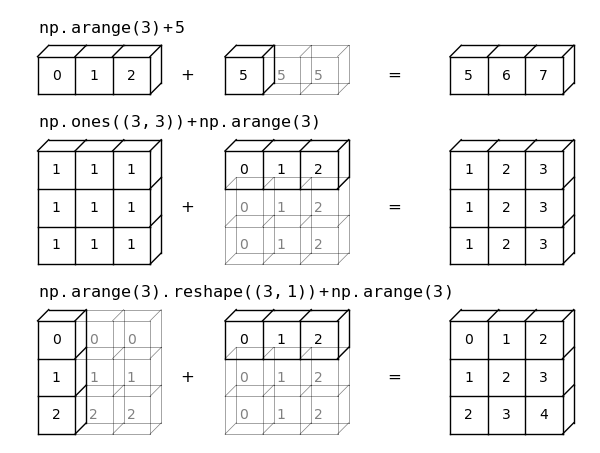

### Rules of Broadcasting   
Follows a strict set of rules to determine the interaction between the two arrays:

- Rule 1: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side.
- Rule 2: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
- Rule 3: If in any dimension the sizes disagree and neither is equal to 1 an error is raised.

## 18/04/20 Broadcasting in Practice

### Centering an array

One commonly seen example is centering an array of data. Imagine you have an array of 10 observations, each conssiting of 3 values. We can store this in 10 X 3 array:

In [8]:
import numpy as np
X = np.random.random((10, 3))

In [9]:
# We can compute the mean of each feature using the mean aggregate across the first dimenion

Xmean = X.mean(0)
Xmean

array([0.53152363, 0.551836  , 0.2740937 ])

In [13]:
# We can centre the X array by subtracting the mean

X_centred = X - Xmean

In [11]:
X_centred.mean(0)

array([ 1.22124533e-16, -1.11022302e-17,  1.11022302e-17])

### Plotting a two-dimensional function 
Broadcasting is useful in displaying images based on two-dimensional functions. If we want to define a function z = f(x, y), broadcasting can be used to compute the function across the grid:

In [14]:
# x and y have 50 steps from 0 to 5
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]

z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

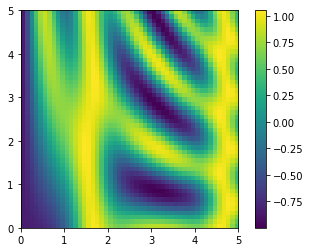

In [18]:
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5],
           cmap='viridis')
plt.colorbar();

# Comaprisons, Masks and Boolean Logic

Masking comes up when you want to extract, modify count, or otherwise manipulate values in an array based on some criterion, for example counting all values greater than a certain value, or remove outliers that are above some threshold. In NumPy, Boolean masking is often the most efficient way to accomplish these types of tasks.

## Example: counting Rainy Days
Imagine you have a series of data that represents the amount of precipitation each day for a year in a given city. For example, here we'll load the daily rainfall statistics for the city of Seattle in 2014, using Pandas.

In [39]:
import numpy as np
import pandas as pd

# use pandas to extract rainfall inches as a NumPy array
rainfall = pd.read_csv('Seattle2014.csv')['PRCP'].values
inches = rainfall / 254.0 # 1/10mm -> inches
inches.shape

(365,)

The array contains 365 values, giving daily rainfall in inches from January 1 to December 31, 2014.

As a first quick visualization, let's look at the histogram of rainy days, which was generated using Matplotlib

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot styles

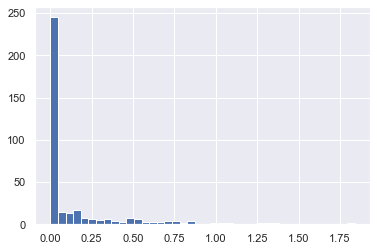

In [41]:
plt.hist(inches, 40);

### Digging into the data   
One approach to this would be to answer these questions by hand: loop through the data, incrementing a counter each time we see values in some desired range. For reasons discussed throughout this chapter, such an approach is very inefficient, both from the standpoint of time writing code and time computing the result. We saw in Computation on NumPy Arrays: Universal Functions that NumPy's ufuncs can be used in place of loops to do fast element-wise arithmetic operations on arrays; in the same way, we can use other ufuncs to do element-wise comparisons over arrays, and we can then manipulate the results to answer the questions we have. We'll leave the data aside for right now, and discuss some general tools in NumPy to use masking to quickly answer these types of questions.

## Comparison Operators as ufuncs
NumPy implements comparison operators such as < and > as element-wise ufuncs. The result of these comparisons is always an array with a Boolean data type. All six og the standard comparison operations are available:

In [19]:
x = np.array([1, 2, 3, 4, 5])

In [20]:
x < 3

array([ True,  True, False, False, False])

In [21]:
x > 3

array([False, False, False,  True,  True])

In [22]:
x <= 3

array([ True,  True,  True, False, False])

In [23]:
x >= 3

array([False, False,  True,  True,  True])

In [24]:
x != 3

array([ True,  True, False,  True,  True])

In [25]:
x == 3

array([False, False,  True, False, False])

Also possible to do an element-wise comparison of two arrays and to include compound expressions:

In [26]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False])

Operators and their equivalent ufuncs:

Operator|Equivalent ufunc
:--|:--
\==|np.equal
\<|np.less
\>|np.greater
!=|np.not_equal
\<=|np.less_equal
\>=|np.greater_equal

These ufuncs will work with arrays of any size and shape.

In [27]:
#here is a two-dimensional example

rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [28]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

## Working with Boolean Arrays   
There are a range of useful operations you can do with Boolean arrays: using the array x in the above example.

In [29]:
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


### Counting entries 
To count the number of True entries in a Boolean array, np.count_nonzero is useful:

In [30]:
# how many values are less than 6?
np.count_nonzero(x < 6)

8

Can also use np.sum since false is interpreted as o and true as 1:

In [31]:
np.sum(x < 6)

8

Summation can be done along rows and columns:

In [32]:
# how many values are less than 6 in each row?
np.sum(x < 6, axis=1)

array([4, 2, 2])

If we're interested in checking whether any or all the values are true we can use np.any and np.all:

In [33]:
# are there any values greater than 8?
np.any( x > 8)

True

In [34]:
# are there any values less than zero?
np.any(x < 0)

False

In [35]:
# are all values less than 10?
np.all( x < 10)

True

In [36]:
#are all values equal to 6?
np.all( x == 6)

False

In [37]:
# are all values in each row less than 8?
np.all(x < 8, axis=1)

array([ True, False,  True])

### Boolean operators

We've already seen how we might count, say, all days with rain less than four inches, or all days with rain greater than two inches. But what if we want to know about all days with rain less than four inches and greater than one inch? This is accomplished through Python's bitwise logic operators, &, |, ^, and ~. Like with the standard arithmetic operators, NumPy overloads these as ufuncs which work element-wise on (usually Boolean) arrays.

In [42]:
np.sum((inches > 0.5) & (inches < 1))

29

Using the equivalence of A AND B and NOT(NOT A OR NOT B) we can compute the same result:

In [43]:
np.sum(~( (inches <= 0.5) | (inches >= 1) ))

29

Combining comparison operators and Boolean operators on arrays can lead to a wide rainge of effiecient logical operations.

Bitwise Boolean operators and their equivalent ufuncs:

Operator|Equivalent ufunc||Operator|Equivalent ufunc
     :--|:---------------||:-------|:---
       &|np.bitwise_and  ||\|      |np.bitwise_or
       ^|np.bitwise_xor  ||~       |np.bitwise_not

We can now start to answer the types of questions we have about our weather data.

In [44]:
print("Number days without rain:           ", np.sum(inches == 0))
print("Number days with rain:              ", np.sum(inches != 0))
print("Days with more than 0.5 inches rain:", np.sum(inches > 0.5))
print("Rainy days with < 0.2 inches:       ", np.sum((inches > 0) & (inches < 0.2)))

Number days without rain:            215
Number days with rain:               150
Days with more than 0.5 inches rain: 37
Rainy days with < 0.2 inches:        75


## Boolean Arrays as Masks
A more powerful pattern is to use Boolean arrays as masks, to select particular subsets of the data themselves. Returning to our x array from before, suppose we want an array of all values in the array that are less than say 5:

In [45]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [46]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

To select these values from the array, we can simply index on this Boolean array; this is known as a masking operation:

In [47]:
x[x < 5]

array([0, 3, 3, 3, 2, 4])


What is returned is a one-dimensional array filled with all the values that meet this condition; in other words, all the values in positions at which the mask array is True.

We can compute some relevant statistics on our Seattle rain data:

In [50]:
# construct a mask of all the rainy days
rainy = (inches > 0)

# construct a mask of all summer days (21st June = day 172)
days = np.arange(365)
summer = (days > 172) & (days < 262)

print("Median precip on rainy days in 2014 (inches):     ",
     np.median(inches[rainy]))
print("Media precip on summer days in 2014 (inches):     ",
     np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches):   ",
     np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches):  ",
     np.median(inches[rainy & ~ summer]))

Median precip on rainy days in 2014 (inches):      0.19488188976377951
Media precip on summer days in 2014 (inches):      0.0
Maximum precip on summer days in 2014 (inches):    0.8503937007874016
Median precip on non-summer rainy days (inches):   0.20078740157480315


## Aside: Using the Keywords and/or Versus the Operators &/|

One common point of confusion is the difference between the keywords and and or on one hand, and the operators & and | on the other hand. When would you use one versus the other?

The difference is this: and and or gauge the truth or falsehood of entire object, while & and | refer to bits within each object.

When you use and or or, it's equivalent to asking Python to treat the object as a single Boolean entity. In Python, all nonzero integers will evaluate as True. Thus:

In [51]:
bool(42), bool(0)

(True, False)

In [52]:
bool(42 and 0)

False

In [53]:
bool(42 or 0)

True

When you use & and | on integers, the expression operates on the bits of the element, applying the and or the or to the individual bits making up the number:

In [54]:
bin(42)

'0b101010'

In [55]:
bin(59)

'0b111011'

In [56]:
bin(42 & 59)

'0b101010'

In [57]:
bin(42 | 59)

'0b111011'

In [58]:
A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
A | B

array([ True,  True,  True, False,  True,  True])

In [59]:
A or B

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [60]:
x = np.arange(10)
(x > 4) & (x < 8)

array([False, False, False, False, False,  True,  True,  True, False,
       False])

In [61]:
(x > 4) and (x < 8)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

# 19/04/20 Fancy Indexing

## Exploring Fancy Indexing
Fancy indexing is conceptually simple: it means passing an array of indices to access ultiple array elements at once. For example:

In [64]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [65]:
# We could acccess three different elements like so
[x[3], x[7], x[2]]

[71, 86, 14]

In [67]:
# We could pass a single list or array of indices
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

When using fancy indexing, the shape of the result reflects the shape of the index arrays rather than the shape of the array being indexed:

In [68]:
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

Fancy indexing works in multiple dimensions.

In [70]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [71]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

Notice that the first value in the result is X[0, 2], the second is X[1, 1], and the third is X[2, 3]. The pairing of indices in fancy indexing follows all the broadcasting rules. So, for example, if we combine a column vector and a row vector within the indices, we get a two-dimensional result:

In [73]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [74]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

It is always important to remember with fancy indexing that the return value reflects the broadcasted shape of the indices, rather than the shape of the array being indexed.

## Combined Indexing
For more powerful operations, fancy indexing can be combined with the other indexing schemes we've seen:

In [75]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


We can combine fancy indexing with slicing:

In [76]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

We can combine fancy indexing with masking:

In [77]:
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

## Example: Selecting Random Points
One common use of fancy indexing is the selection of subsets of rows from a matrix. For example, we might have an $N$ by $D$ matrix representing $N$ points in $D$ dimensions, such as the following points drawn from a two-dimensional normal distribution:

In [80]:
mean = [0, 0]
cov =[[1, 2],
      [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

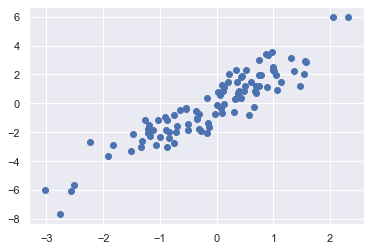

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # for plot styling

plt.scatter(X[:, 0], X[:, 1]);

Let's use fancy indexing to select 20 random points. We'll do this by first choosing 20 random indices with no repeats, and use these indices to select a portion of the original array:

In [83]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([21, 39, 38, 61, 98, 93,  9, 64, 45, 20, 31, 19, 92, 73, 44, 59, 47,
        7, 26, 90])

In [84]:
selection = X[indices] # fancy indexing here
selection.shape

(20, 2)

To see which points were selected, let's over-plot large circles at the locations of the selected points:

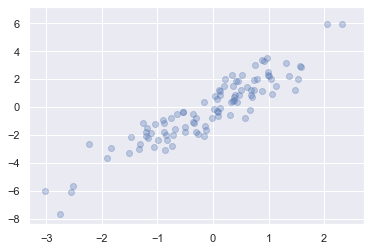

In [86]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1],
           facecolor='none', s=200);

## Modifying Values with Fancy Indexing
Just as fancy indexing can be used to access parts of an array, it can also be used to modify parts of an array. For example, imagine we have an array of indices and we'd like to set the corresponding items in an array to some value:

In [88]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


We can use any assignment-type operator for this. For example:

In [89]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


Notice that repeated indices with these operations can cause some potentially unexpected results. Consider the following:

In [90]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


The result of this operation is to first assign x[0] = 4, followed by x[0] = 6. The result, of course, is that x[0] contains the value 6.

Fair enough, but consider this operation:

In [91]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

ou might expect that x[3] would contain the value 2, and x[4] would contain the value 3, as this is how many times each index is repeated. Why is this not the case? Conceptually, this is because x[i] += 1 is meant as a shorthand of x[i] = x[i] + 1. x[i] + 1 is evaluated, and then the result is assigned to the indices in x. With this in mind, it is not the augmentation that happens multiple times, but the assignment, which leads to the rather nonintuitive results.

So what if you want the other behavior where the operation is repeated? For this, you can use the at() method of ufuncs (available since NumPy 1.8), and do the following:

In [92]:
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


The at() method does an in-place application of the given operator at the specified indices (here, i) with the specified value (here, 1). Another method that is similar in spirit is the reduceat() method of ufuncs, which you can read about in the NumPy documentation.

## Example: Binning Data

You can use these ideas to efficiently bin data to create a histogram by hand. For example, imagine we have 1,000 values and would like to quickly find where they fall within an array of bins. We could compute it using ufunc.at like this:

In [93]:
np.random.seed(42)
x = np.random.randn(100)

# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# find the appropriate bin for each x
i = np.searchsorted(bins, x)

# add 1 to each of these bins
np.add.at(counts, i, 1)

C:\Users\Richard\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).
  


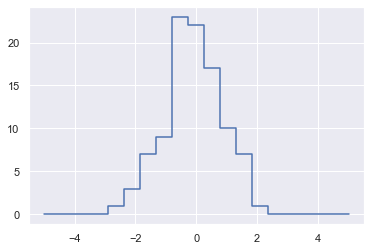

In [94]:
#plot the results
plt.plot(bins, counts, linestyle='steps');

Of course, it would be silly to have to do this each time you want to plot a histogram. This is why Matplotlib provides the plt.hist() routine, which does the same in a single line:

plt.hist(x, bins, histtype='step');   
This function will create a nearly identical plot to the one seen here. To compute the binning, matplotlib uses the np.histogram function, which does a very similar computation to what we did before. Let's compare the two here:

In [95]:
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
22.1 µs ± 1.14 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Custom routine:
18.1 µs ± 3.3 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


 NumPy's algorithm is more flexible, and particularly is designed for better performance when the number of data points becomes large:

In [96]:
x = np.random.randn(1000000)
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
62.9 ms ± 1.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Custom routine:
106 ms ± 300 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
